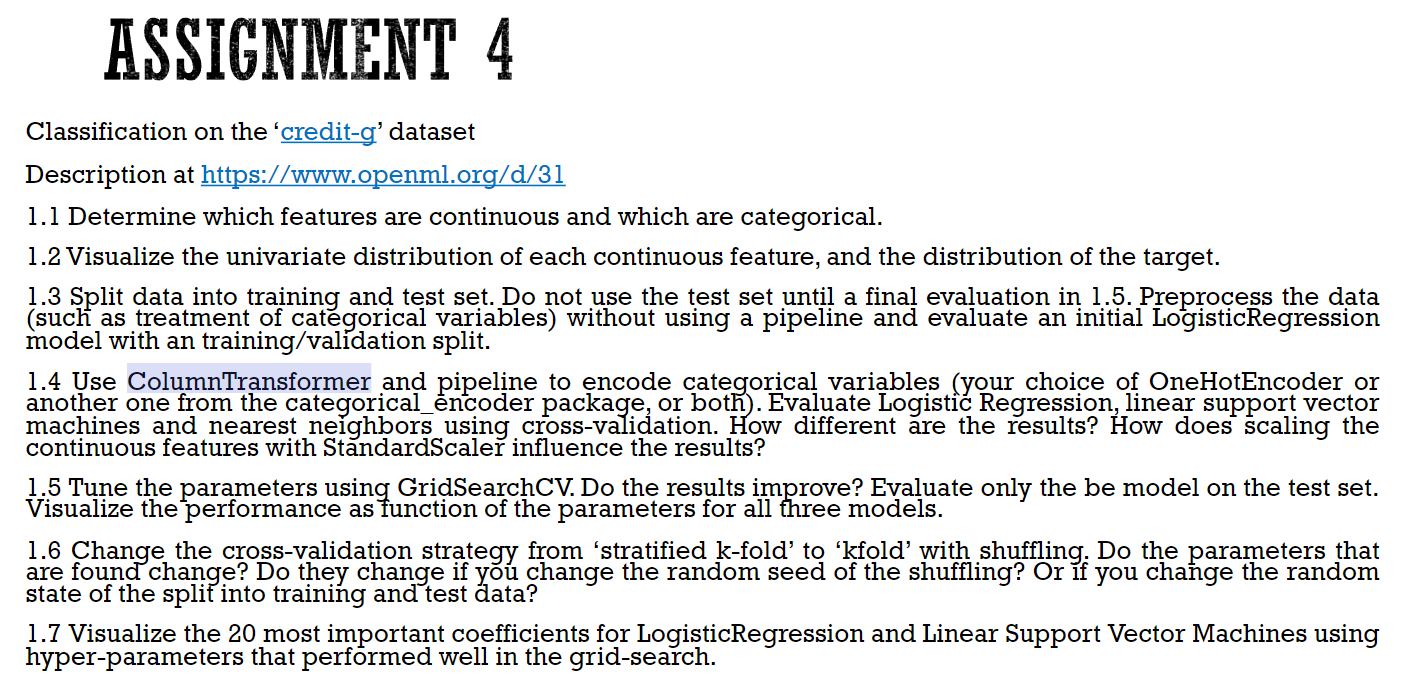

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, LeaveOneOut, cross_val_score, GridSearchCV, ParameterGrid
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import confusion_matrix
# import category_encoders as ce
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv('AML_ComplexityValidation.csv')
data

,id,'checking_status','duration','credit_history','purpose','credit_amount','savings_status','employment','installment_commitment','personal_status',...,'property_magnitude','age','other_payment_plans','housing','existing_credits','job','num_dependents','own_telephone','foreign_worker','class'
0,1,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,3,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,4,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,5,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,997,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,998,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,...,car,38,none,own,1,skilled,1,none,yes,good
998,999,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


1.1 Determine which features are continuous and which are categorical.

In [3]:
credit_data = fetch_openml('credit-g', version='active')

C:\Program Files\Python\lib\site-packages\sklearn\datasets\_openml.py:373: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  warn("Multiple active versions of the dataset matching the name"


In [4]:
credit_data.feature_names

['checking_status',
 'duration',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings_status',
 'employment',
 'installment_commitment',
 'personal_status',
 'other_parties',
 'residence_since',
 'property_magnitude',
 'age',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker']

In [5]:
credit_data.categories

{'checking_status': ['<0', '0<=X<200', '>=200', 'no checking'],
 'credit_history': ['no credits/all paid',
  'all paid',
  'existing paid',
  'delayed previously',
  'critical/other existing credit'],
 'purpose': ['new car',
  'used car',
  'furniture/equipment',
  'radio/tv',
  'domestic appliance',
  'repairs',
  'education',
  'vacation',
  'retraining',
  'business',
  'other'],
 'savings_status': ['<100',
  '100<=X<500',
  '500<=X<1000',
  '>=1000',
  'no known savings'],
 'employment': ['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7'],
 'personal_status': ['male div/sep',
  'female div/dep/mar',
  'male single',
  'male mar/wid',
  'female single'],
 'other_parties': ['none', 'co applicant', 'guarantor'],
 'property_magnitude': ['real estate',
  'life insurance',
  'car',
  'no known property'],
 'other_payment_plans': ['bank', 'stores', 'none'],
 'housing': ['rent', 'own', 'for free'],
 'job': ['unemp/unskilled non res',
  'unskilled resident',
  'skilled',
  'high qualif/self emp

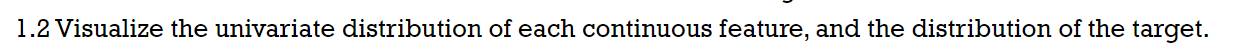

In [6]:
credit_dataframe = pd.DataFrame(credit_data.data, columns=credit_data.feature_names)
credit_dataframe['class'] = credit_data.target

In [7]:
credit_dataframe.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0.0,6.0,4.0,3.0,1169.0,4.0,4.0,4.0,2.0,0.0,...,0.0,67.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,good
1,1.0,48.0,2.0,3.0,5951.0,0.0,2.0,2.0,1.0,0.0,...,0.0,22.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,bad
2,3.0,12.0,4.0,6.0,2096.0,0.0,3.0,2.0,2.0,0.0,...,0.0,49.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,good
3,0.0,42.0,2.0,2.0,7882.0,0.0,3.0,2.0,2.0,2.0,...,1.0,45.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0,good
4,0.0,24.0,3.0,0.0,4870.0,0.0,2.0,3.0,2.0,0.0,...,3.0,53.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,bad


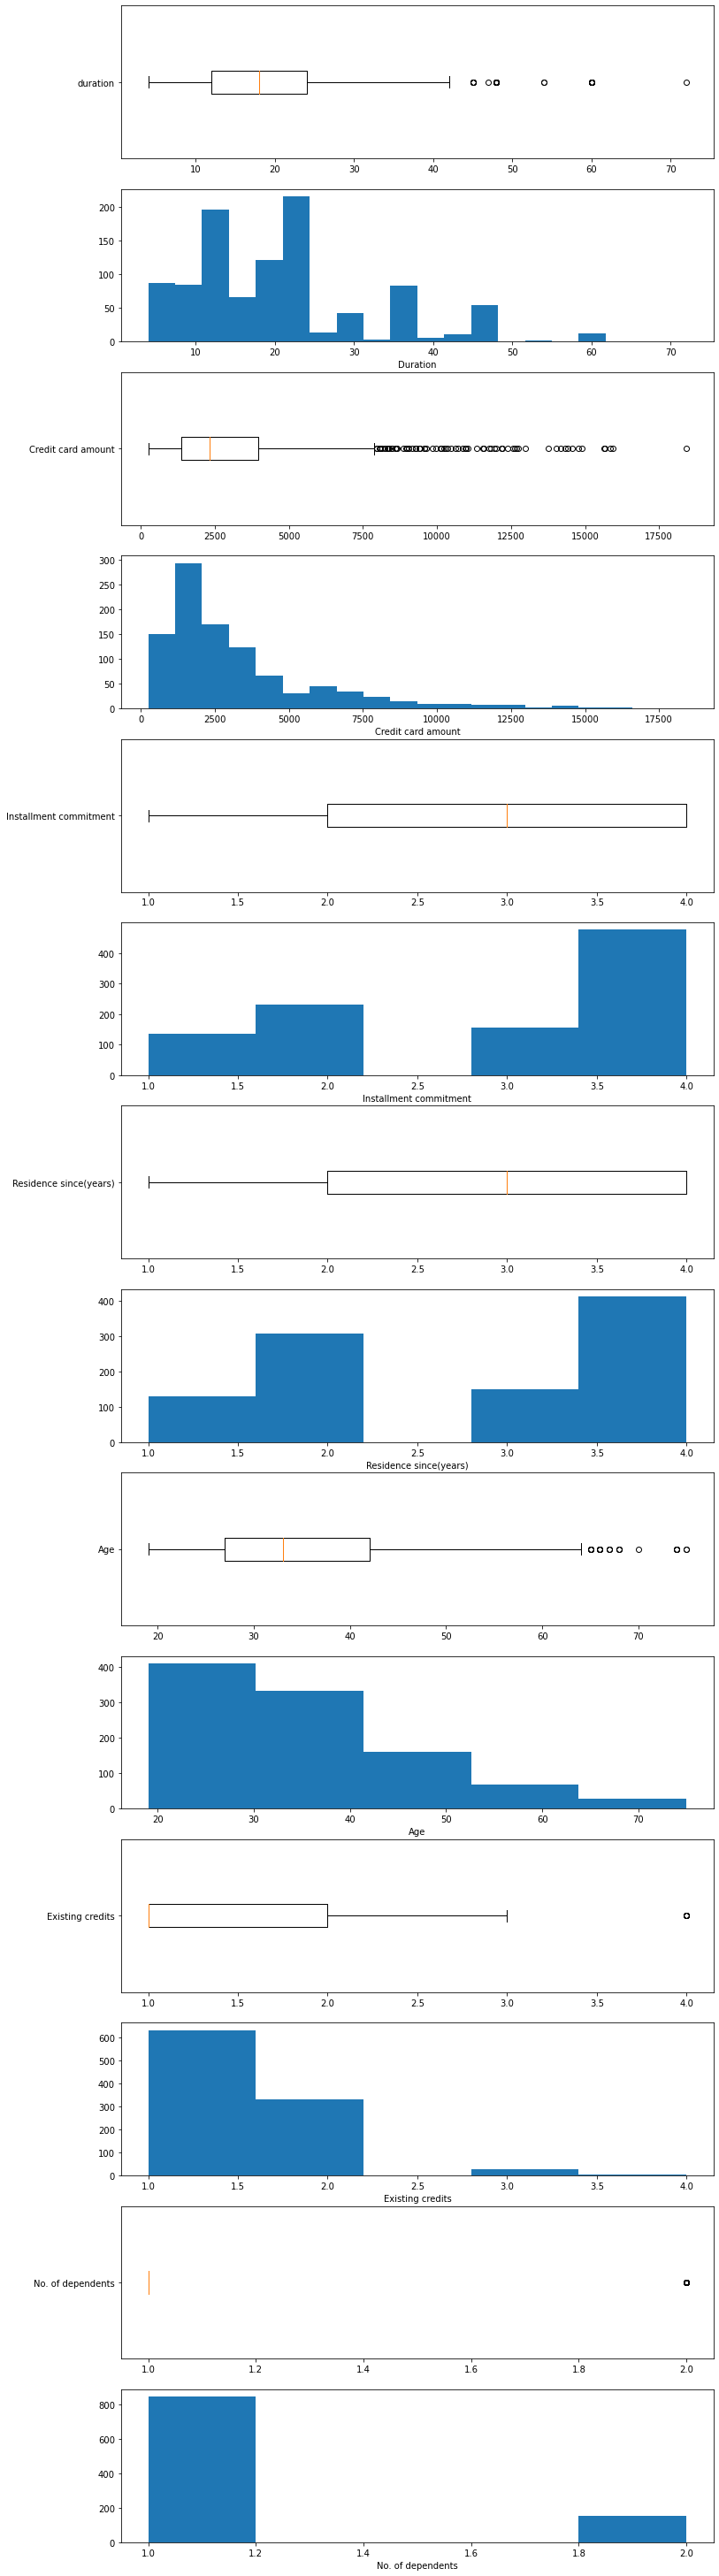

In [8]:
duration_data = credit_dataframe['duration']
credit_amt_data = credit_dataframe['credit_amount']
inst_data = credit_dataframe['installment_commitment']
years_data = credit_dataframe['residence_since']
age_data = credit_dataframe['age']
excredit_data = credit_dataframe['existing_credits']
dep_data = credit_dataframe['num_dependents']

plt.figure(figsize=(12, 40))

# plotting boxplot and histogram for duration
ax71 = plt.subplot(14, 1, 1)
ax71.boxplot(duration_data, vert=False)
ax71.set_yticklabels(['duration'])

ax72 = plt.subplot(14,1,2)
ax72.hist(duration_data, bins=20)
ax72.set_xlabel('Duration')

# plotting box plot and histogram for credit card amount
ax73 = plt.subplot(14, 1, 3)
ax73.boxplot(credit_amt_data, vert=False)
ax73.set_yticklabels(['Credit card amount'])

ax74 = plt.subplot(14, 1, 4)
ax74.hist(credit_amt_data, bins=20)
ax74.set_xlabel('Credit card amount')

# plotting box plot and histogram for installment_commitment
ax75 = plt.subplot(14, 1, 5)
ax75.boxplot(inst_data, vert=False)
ax75.set_yticklabels(['Installment commitment'])

ax76 = plt.subplot(14,1,6)
ax76.hist(inst_data, bins=5)
ax76.set_xlabel('Installment commitment')

# plotting box plot and histogram for residence_since
ax77 = plt.subplot(14, 1, 7)
ax77.boxplot(years_data, vert=False)
ax77.set_yticklabels(['Residence since(years)'])

ax78 = plt.subplot(14, 1, 8)
ax78.hist(years_data, bins=5)
ax78.set_xlabel('Residence since(years)')

# plotting box plot and histogram for age
ax79 = plt.subplot(14, 1, 9)
ax79.boxplot(age_data, vert=False)
ax79.set_yticklabels(['Age'])

ax710 = plt.subplot(14, 1, 10)
ax710.hist(age_data, bins=5)
ax710.set_xlabel('Age')

# plotting box plot and histogram for existing credits
ax711 = plt.subplot(14, 1, 11)
ax711.boxplot(excredit_data, vert=False)
ax711.set_yticklabels(['Existing credits'])

ax712 = plt.subplot(14, 1, 12)
ax712.hist(excredit_data, bins=5)
ax712.set_xlabel('Existing credits')

# plotting box plot and histogram for num_dependents
ax713 = plt.subplot(14, 1, 13)
ax713.boxplot(dep_data, vert=False)
ax713.set_yticklabels(['No. of dependents'])

ax712 = plt.subplot(14, 1, 14)
ax712.hist(dep_data, bins=5)
ax712.set_xlabel('No. of dependents')


plt.subplots_adjust(top=1, bottom=0.004)
plt.show()

Plotting target


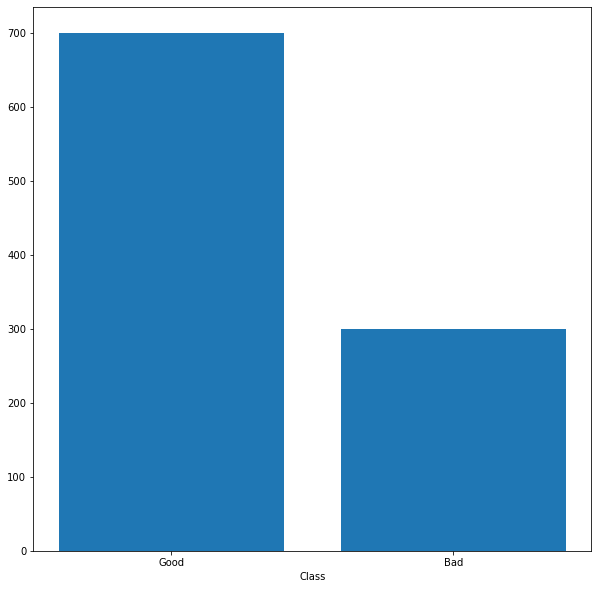

In [9]:
print('Plotting target')
class_ = credit_dataframe['class']
num_good = class_[class_ == 'good']
num_bad = class_[class_ == 'bad']
labels = ['Good', 'Bad']
y_pos = np.arange(2)
x_values = [len(num_good), len(num_bad)]
plt.figure(figsize=(10, 10))
plt.bar(y_pos, x_values)
plt.xticks(np.arange(2), ('Good', 'Bad'))
plt.xlabel('Class')

plt.show()

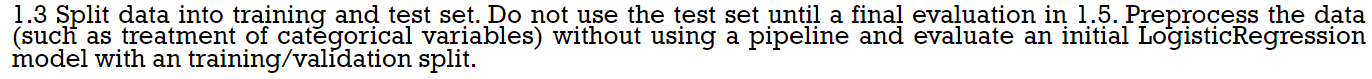



In [10]:
credit_dataX, credit_datay = fetch_openml('credit-g', version='active', as_frame=True, return_X_y =True)
categorical_features = ['checking_status', 'credit_history', 'employment', 'foreign_worker',
'housing',
'job',
'other_parties',
'other_payment_plans',
'own_telephone',
'personal_status',
'property_magnitude',
'purpose',
'savings_status']
credit_dataX_ordinal = credit_dataX.copy()
for feature in credit_dataX.iteritems():
  if feature[0] in categorical_features:
    credit_dataX_ordinal[feature[0]] = credit_dataX[feature[0]].astype("category").cat.codes

C:\Program Files\Python\lib\site-packages\sklearn\datasets\_openml.py:373: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  warn("Multiple active versions of the dataset matching the name"


In [11]:
credit_dataX_ordinal.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,0,6.0,4,3,1169.0,4,4,4.0,2,0,4.0,0,67.0,2,1,2.0,2,1.0,1,0
1,1,48.0,2,3,5951.0,0,2,2.0,1,0,2.0,0,22.0,2,1,1.0,2,1.0,0,0
2,3,12.0,4,6,2096.0,0,3,2.0,2,0,3.0,0,49.0,2,1,1.0,1,2.0,0,0
3,0,42.0,2,2,7882.0,0,3,2.0,2,2,4.0,1,45.0,2,2,1.0,2,2.0,0,0
4,0,24.0,3,0,4870.0,0,2,3.0,2,0,4.0,3,53.0,2,2,2.0,2,2.0,0,0


In [12]:
le = LabelEncoder()
y = le.fit_transform(credit_datay)

In [13]:
# creating the training test split
X_trainval, X_test, y_trainval, y_test = train_test_split(credit_dataX_ordinal, y)
# creating the training validation split
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)

In [14]:
numeric_features = [feature for feature in credit_data.feature_names if feature not in categorical_features]

In [15]:
scaler = StandardScaler()
X_train_scaled = X_train
X_train_scaled[numeric_features] = scaler.fit_transform(X_train_scaled[numeric_features])

X_val_scaled = X_val
X_val_scaled[numeric_features] = scaler.fit_transform(X_val_scaled[numeric_features])

logistic_regression = LogisticRegression().fit(X_train, y_train)
logistic_regression.predict(X_val)
logistic_regression.score(X_val, y_val)

<ipython-input-15-421fe6a0e931>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_scaled[numeric_features] = scaler.fit_transform(X_train_scaled[numeric_features])
C:\Program Files\Python\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-15-421fe6a0e931>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

0.7712765957446809

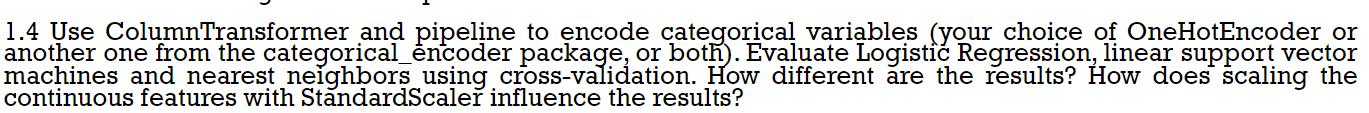

In [16]:
# creating the training test split anew
X_trainval_pipe, X_test_pipe, y_trainval_pipe, y_test_pipe = train_test_split(credit_dataX, credit_datay)
# creating a Repeated Stratified K fold
skf = StratifiedKFold(n_splits=5, shuffle=True)

In [17]:
print('Logistic Regression (without scaled data)')
preprocess_lr = make_column_transformer(
    (OneHotEncoder(), categorical_features))
model_lr = make_pipeline(preprocess_lr, LogisticRegression())
model_lr.fit(X_trainval_pipe, y_trainval_pipe)
scores_lr = cross_val_score(model_lr, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_lr)))

Logistic Regression (without scaled data)
score: 0.732


In [18]:
print('Logistic Regression (with scaling)')
preprocess_lrs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_lrs = make_pipeline(preprocess_lrs, LogisticRegression())
model_lrs.fit(X_trainval_pipe, y_trainval_pipe)
scores_lrs = cross_val_score(model_lrs, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_lrs)))

Logistic Regression (with scaling)
score: 0.741


In [19]:
print('Linear Support Vector (SVC) without scaling')
preprocess_svc = make_column_transformer(
    (OneHotEncoder(), categorical_features))
model_svc = make_pipeline(preprocess_svc, LinearSVC())
model_svc.fit(X_trainval_pipe, y_trainval_pipe)
scores_svc = cross_val_score(model_svc, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_svc)))

Linear Support Vector (SVC) without scaling
score: 0.728


In [20]:
print('Linear Support Vector (SVC) with scaling')
preprocess_svcs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_svcs = make_pipeline(preprocess_svcs, LinearSVC( max_iter=5000))
model_svcs.fit(X_trainval_pipe, y_trainval_pipe)
scores_svcs = cross_val_score(model_svcs, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_svcs)))

Linear Support Vector (SVC) with scaling
score: 0.740


In [21]:
print('Nearest neighbors without scaling')
preprocess_knn = make_column_transformer(
    (OneHotEncoder(), categorical_features))
model_knn = make_pipeline(preprocess_knn, KNeighborsClassifier())
model_knn.fit(X_trainval_pipe, y_trainval_pipe)
scores_knn = cross_val_score(model_knn, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_knn)))

Nearest neighbors without scaling
score: 0.708


In [22]:
print('Nearest neighbors with scaling')
preprocess_knns = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_knns = make_pipeline(preprocess_knns, KNeighborsClassifier())
model_knns.fit(X_trainval_pipe, y_trainval_pipe)
scores_knns = cross_val_score(model_knns, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_knns)))

Nearest neighbors with scaling
score: 0.727


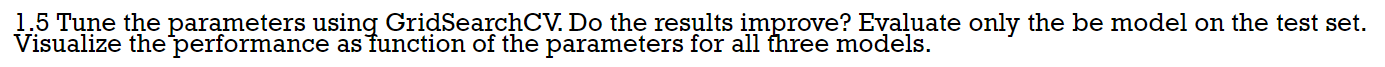

In [23]:
X_trainval, X_test, y_trainval, y_test = train_test_split(credit_dataX_ordinal, y)

In [24]:
print('Tuning for Logistic regression')
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
param_grid = {"logisticregression__C" : np.logspace(-4, 20, 20)}
grid_lr = GridSearchCV(lr_pipe, param_grid, cv=skf, return_train_score=True)
grid_lr.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_lr.best_score_))
print("best parameters: {}".format(grid_lr.best_params_))

Tuning for Logistic regression
best mean cross-validation score: 0.753
best parameters: {'logisticregression__C': 0.615848211066026}


In [25]:
preprocess_lrs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_lrs = make_pipeline(preprocess_lrs, LogisticRegression(C=0.615848211066026))
model_lrs.fit(X_trainval_pipe, y_trainval_pipe)
scores_lrs = cross_val_score(model_lrs, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_lrs)))

score: 0.747


In [26]:
print('Tuning for SVC')
svc_pipe = make_pipeline(StandardScaler(), LinearSVC())
param_grid = {'linearsvc__C': np.logspace(-10, 5, 20)}
grid_svc = GridSearchCV(svc_pipe, param_grid, cv=skf, scoring='accuracy', return_train_score=True)
grid_svc.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_svc.best_score_))
print("best parameters: {}".format(grid_svc.best_params_))
#print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

Tuning for SVC


C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

best mean cross-validation score: 0.751
best parameters: {'linearsvc__C': 0.0012742749857031347}


C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [27]:
preprocess_svcs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_svcs = make_pipeline(preprocess_svcs, LinearSVC(C=0.04832930238571752))
model_svcs.fit(X_trainval_pipe, y_trainval_pipe)
scores_svcs = cross_val_score(model_svcs, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_svcs)))

score: 0.725


In [28]:
print('Tuning for KNeighborsClassifier')
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
param_grid = {'kneighborsclassifier__n_neighbors': range(10, 20)}
grid = GridSearchCV(knn_pipe, param_grid, cv=skf, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
#print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

Tuning for KNeighborsClassifier
best mean cross-validation score: 0.738
best parameters: {'kneighborsclassifier__n_neighbors': 10}


In [29]:
preprocess_knns = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_knns = make_pipeline(preprocess_knns, KNeighborsClassifier(n_neighbors=10))
model_knns.fit(X_trainval_pipe, y_trainval_pipe)
scores_knns = cross_val_score(model_knns, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
print("score: {:.3f}".format(np.mean(scores_knns)))

score: 0.721


In [30]:
print("test-set score: {:.3f}".format(grid_lr.score(X_test, y_test)))

test-set score: 0.780


### Visualizing performance

#### For logistic regression

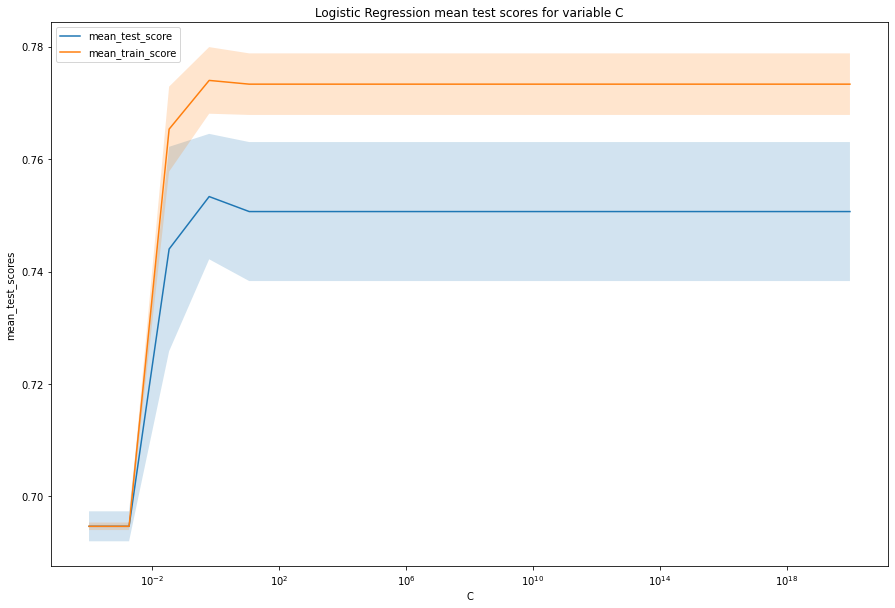

In [31]:
lr_cvalues = np.logspace(-4, 20, 20)
lr_mean_test_scores = np.asarray(grid_lr.cv_results_['mean_test_score'])
lr_mean_train_scores = np.asarray(grid_lr.cv_results_['mean_train_score'])
std_test = np.asarray(grid_lr.cv_results_['std_test_score'])
std_train = np.asarray(grid_lr.cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(lr_cvalues, lr_mean_test_scores, label='mean_test_score')
ax.plot(lr_cvalues, lr_mean_train_scores, label='mean_train_score')
ax.set_xscale("log")
ax.fill_between(lr_cvalues, lr_mean_test_scores + std_test, lr_mean_test_scores - std_test, alpha=0.2)
ax.fill_between(lr_cvalues, lr_mean_train_scores+std_train, lr_mean_train_scores-std_train, alpha=0.2)

ax.set(xlabel='C', ylabel='mean_test_scores',
       title='Logistic Regression mean test scores for variable C')
ax.legend(loc='upper left')

plt.show()

#### For SVC

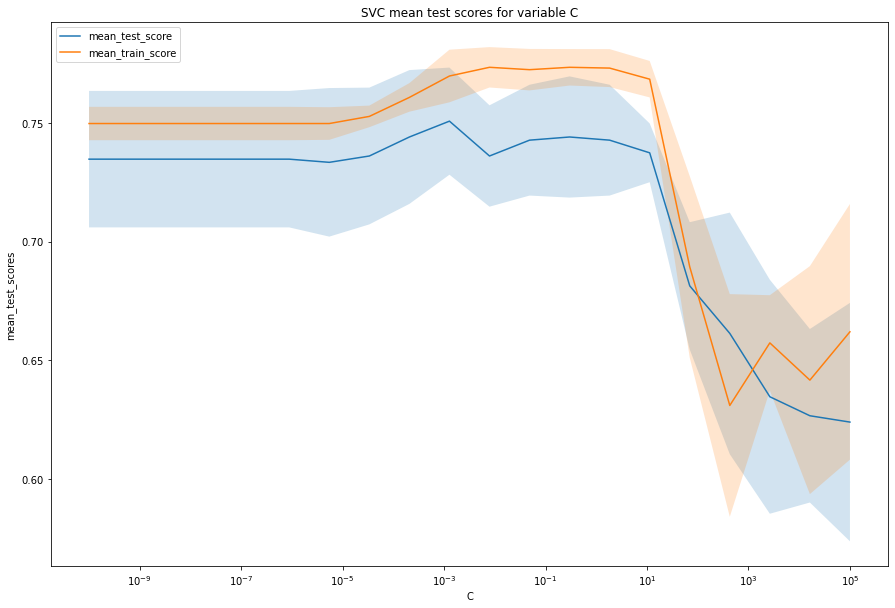

In [32]:
svc_c_values = np.logspace(-10, 5, 20)
svc_mean_test_scores = np.asarray(grid_svc.cv_results_['mean_test_score'])
svc_mean_train_scores = np.asarray(grid_svc.cv_results_['mean_train_score'])
std_test = np.asarray(grid_svc.cv_results_['std_test_score'])
std_train = np.asarray(grid_svc.cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(svc_c_values, svc_mean_test_scores, label='mean_test_score')
ax.plot(svc_c_values, svc_mean_train_scores, label='mean_train_score')
ax.set_xscale("log")
ax.fill_between(svc_c_values, svc_mean_test_scores + std_test, svc_mean_test_scores - std_test, alpha=0.2)
ax.fill_between(svc_c_values, svc_mean_train_scores+std_train, svc_mean_train_scores-std_train, alpha=0.2)

ax.set(xlabel='C', ylabel='mean_test_scores',
       title='SVC mean test scores for variable C')
ax.legend(loc='upper left')

plt.show()

#### For KNearestNeighbors

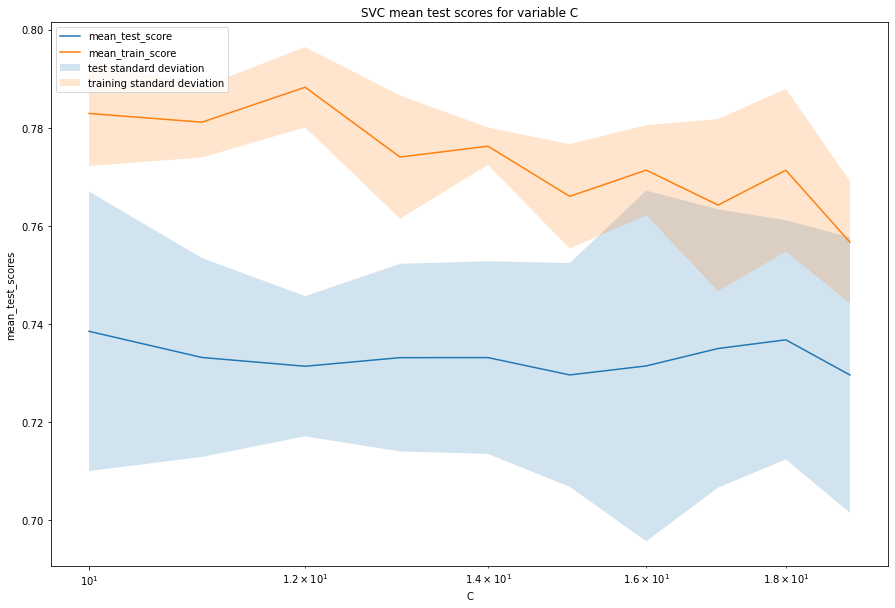

In [33]:
knn_c_values = range(10, 20)
knn_mean_test_scores = np.asarray(grid.cv_results_['mean_test_score'])
knn_mean_train_scores = np.asarray(grid.cv_results_['mean_train_score'])
std_test = np.asarray(grid.cv_results_['std_test_score'])
std_train = np.asarray(grid.cv_results_['std_train_score'])

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(knn_c_values, knn_mean_test_scores, label='mean_test_score')
ax.plot(knn_c_values, knn_mean_train_scores, label='mean_train_score')
ax.set_xscale("log")
ax.fill_between(knn_c_values, knn_mean_test_scores + std_test, knn_mean_test_scores - std_test, alpha=0.2, label='test standard deviation')
ax.fill_between(knn_c_values, knn_mean_train_scores+std_train, knn_mean_train_scores-std_train, alpha=0.2, label='training standard deviation')

ax.set(xlabel='C', ylabel='mean_test_scores',
       title='SVC mean test scores for variable C')
ax.legend(loc='upper left')

plt.show()

In [34]:
kfold1 = KFold(n_splits=5, shuffle=True, random_state=0)
kfold2 = KFold(n_splits=5, shuffle=True, random_state=1)

#### For Logistic Regression

In [35]:
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(C=0.615848211066026))
param_grid = {"logisticregression__C" : np.logspace(-4, 20, 20)}
grid_lr = GridSearchCV(lr_pipe, param_grid, cv=skf, return_train_score=True)
grid_lr.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_lr.best_score_))
print("best parameters: {}".format(grid_lr.best_params_))

grid_lrk1 = GridSearchCV(lr_pipe, param_grid, cv=kfold1, return_train_score=True)
grid_lrk1.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_lrk1.best_score_))
print("best parameters: {}".format(grid_lrk1.best_params_))

grid_lrk2 = GridSearchCV(lr_pipe, param_grid, cv=kfold2, return_train_score=True)
grid_lrk2.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_lrk2.best_score_))
print("best parameters: {}".format(grid_lrk2.best_params_))

best mean cross-validation score: 0.755
best parameters: {'logisticregression__C': 0.03359818286283781}
best mean cross-validation score: 0.748
best parameters: {'logisticregression__C': 206.913808111479}
best mean cross-validation score: 0.748
best parameters: {'logisticregression__C': 0.615848211066026}


#### For SVC

In [36]:
svc_pipe = make_pipeline(StandardScaler(), LinearSVC(C=0.04832930238571752))
param_grid = {"linearsvc__C" : np.logspace(-10, 5, 20)}
grid_svc = GridSearchCV(svc_pipe, param_grid, cv=skf, return_train_score=True)
grid_svc.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_svc.best_score_))
print("best parameters: {}".format(grid_svc.best_params_))

grid_svck1 = GridSearchCV(svc_pipe, param_grid, cv=kfold1, return_train_score=True)
grid_svck1.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_svck1.best_score_))
print("best parameters: {}".format(grid_svck1.best_params_))

grid_svck2 = GridSearchCV(svc_pipe, param_grid, cv=kfold2, return_train_score=True)
grid_svck2.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_svck2.best_score_))
print("best parameters: {}".format(grid_svck2.best_params_))

C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

best mean cross-validation score: 0.757
best parameters: {'linearsvc__C': 0.0012742749857031347}


C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

best mean cross-validation score: 0.748
best parameters: {'linearsvc__C': 0.04832930238571752}


C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

best mean cross-validation score: 0.756
best parameters: {'linearsvc__C': 0.0012742749857031347}


C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Program Files\Python\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

#### For KNN

In [37]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=10))
param_grid = {'kneighborsclassifier__n_neighbors': range(10, 20)}

grid_knn = GridSearchCV(knn_pipe, param_grid, cv=skf, return_train_score=True)
grid_knn.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_knn.best_score_))
print("best parameters: {}".format(grid_knn.best_params_))

grid_knnk1 = GridSearchCV(knn_pipe, param_grid, cv=kfold1, return_train_score=True)
grid_knnk1.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_knnk1.best_score_))
print("best parameters: {}".format(grid_knnk1.best_params_))

grid_knnk2 = GridSearchCV(knn_pipe, param_grid, cv=kfold2, return_train_score=True)
grid_knnk2.fit(X_trainval, y_trainval)
print("best mean cross-validation score: {:.3f}".format(grid_knnk2.best_score_))
print("best parameters: {}".format(grid_knnk2.best_params_))

best mean cross-validation score: 0.744
best parameters: {'kneighborsclassifier__n_neighbors': 16}
best mean cross-validation score: 0.737
best parameters: {'kneighborsclassifier__n_neighbors': 18}
best mean cross-validation score: 0.736
best parameters: {'kneighborsclassifier__n_neighbors': 16}


In [38]:
X_trainval16, X_test16, y_trainval16, y_test16 = train_test_split(credit_dataX_ordinal, y, random_state=10)

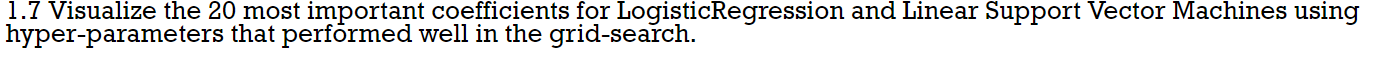

In [39]:
categorical_fe = credit_dataX[categorical_features]
enc = OneHotEncoder()
enc.fit_transform(categorical_fe)
encoded_categories = list(enc.get_feature_names(categorical_features))
all_features = numeric_features + encoded_categories

In [40]:
plr = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
mlr = make_pipeline(plr, LogisticRegression(C=0.03359818286283781))
mlr.fit(X_trainval_pipe, y_trainval_pipe)
coefficients = mlr.steps[1][1].coef_

In [41]:
# convert the above array into an array of tuples
coeff_tuples = []
for index, coeff in enumerate(coefficients[0]):
 coeff_tuples.append((index, coeff))
sorted_tuples = sorted(coeff_tuples, key = lambda x: x[1])

In [42]:
best_coeff = sorted_tuples[-20:]
indices = [ tup[0] for tup in best_coeff ]
coeffs = [tup[1] for tup in best_coeff]
# map indices to column names
feature_names = []
for index in indices:
  feature_names.append(all_features[index])

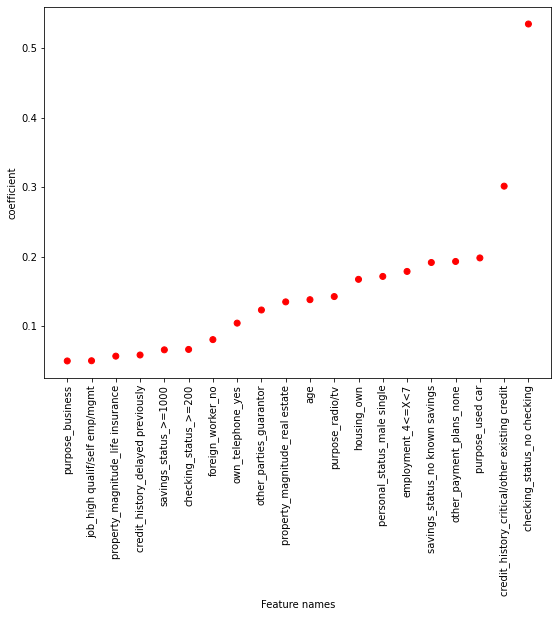

In [43]:
coeffs = [tup[1] for tup in best_coeff]

plt.figure(figsize=(20,15))
ax11 = plt.subplot(2, 2, 1)
ax11.set_xlabel('Feature names')
ax11.set_ylabel('coefficient')
ax11.scatter(feature_names, coeffs, c=np.sign(coeffs), cmap='bwr_r')
plt.xticks(rotation=90)
plt.show()

In [44]:
preprocess_svcs = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features))
model_svcs = make_pipeline(preprocess_svcs, LinearSVC(C=0.04832930238571752))
model_svcs.fit(X_trainval_pipe, y_trainval_pipe)
scores_svcs = cross_val_score(model_svcs, X_trainval_pipe, y_trainval_pipe, cv=skf, scoring='accuracy')
coefficients = model_svcs.steps[1][1].coef_

In [45]:
coeff_tuples = []
for index, coeff in enumerate(coefficients[0]):
  coeff_tuples.append((index, coeff))
sorted_tuples = sorted(coeff_tuples, key = lambda x: x[1])
best_coeff = sorted_tuples[-20:]
indices = [ tup[0] for tup in best_coeff ]
coeffs = [tup[1] for tup in best_coeff]
feature_names = []
for index in indices:
  feature_names.append(all_features[index])

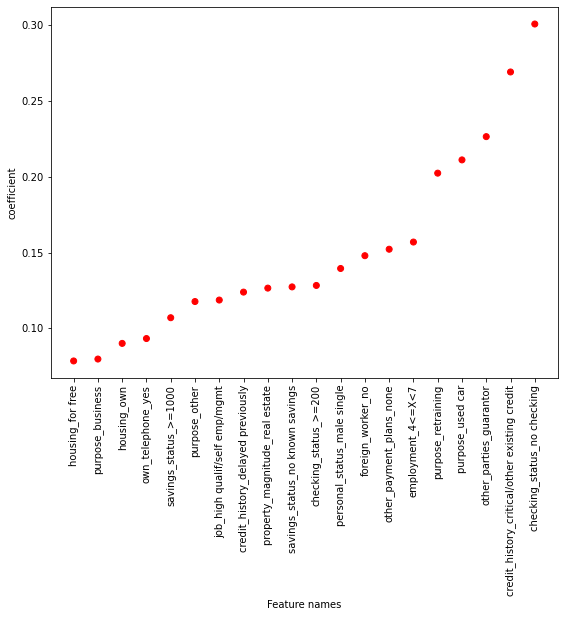

In [46]:
plt.figure(figsize=(20,15))
ax11 = plt.subplot(2, 2, 1)
ax11.set_xlabel('Feature names')
ax11.set_ylabel('coefficient')
ax11.scatter(feature_names, coeffs, c=np.sign(coeffs), cmap='bwr_r')
plt.xticks(rotation=90)
plt.show()